In [1]:
import pandas as pd
import csv
import math

df = pd.read_csv("../data_IA/contaminacion_madrid.csv", nrows = 5000, sep = ';')

dfinal = pd.DataFrame(df, columns = ['punto_muestreo', 'ano', 'mes',
                                     'dia', 'h01', 'h02', 'h05', 'h06',
                                     'h07', 'h08', 'h09', 'h10', 'h11',
                                     'h12', 'h13', 'h14', 'h15', 'h16',
                                     'h17', 'h18', 'h19', 'h20', 'h21',
                                     'h22', 'h23', 'h24'])

dfinal.mean().round(1)

punto_muestreo       inf
ano               2022.0
mes                  9.0
dia                 13.5
h01                 16.2
h02                 15.5
h05                 15.6
h06                 17.5
h07                 20.3
h08                 19.7
h09                 18.6
h10                 18.6
h11                 18.7
h12                 19.0
h13                 19.2
h14                 19.3
h15                 19.3
h16                 19.2
h17                 19.2
h18                 19.3
h19                 19.9
h20                 20.6
h21                 20.2
h22                 19.0
h23                 17.9
h24                 16.8
dtype: float64

In [ ]:
##Si meto la media no me sale luego el punto de muestreo con el max
dfinal.loc['media'] = dfinal.mean()

dfinal.tail()

In [ ]:
## Mayores focos de contaminacion segun horas 
## Mañana: 7.00 am (h07) Tarde: 8.00 pm (h20)

In [6]:
## Comprobando que no haya dos puntos de muestreo iguales
dfinal.duplicated(subset=['punto_muestreo'])

0       False
1       False
2       False
3       False
4       False
        ...  
4181     True
4182     True
4183     True
4184     True
4185     True
Length: 4186, dtype: bool

In [7]:
## Buscamos el punto muestreo (x hora) que mas contaminacion capta
import pandas as pd

dfmax0 = pd.DataFrame(dfinal)

dfmax0[['punto_muestreo', 'h07']].max()

punto_muestreo    28180001_9_49
h07                       248.0
dtype: object

In [ ]:
### punto_muestreo    28180001_9_49
### h07                       248.0


In [8]:
dfmax1 = pd.DataFrame(dfinal)

dfmax1[['punto_muestreo', 'h20']].max()

punto_muestreo    28180001_9_49
h20                       176.0
dtype: object

In [ ]:
### punto_muestreo    28180001_9_49
### h20                       176.0

<AxesSubplot:xlabel='punto_muestreo', ylabel='h07'>

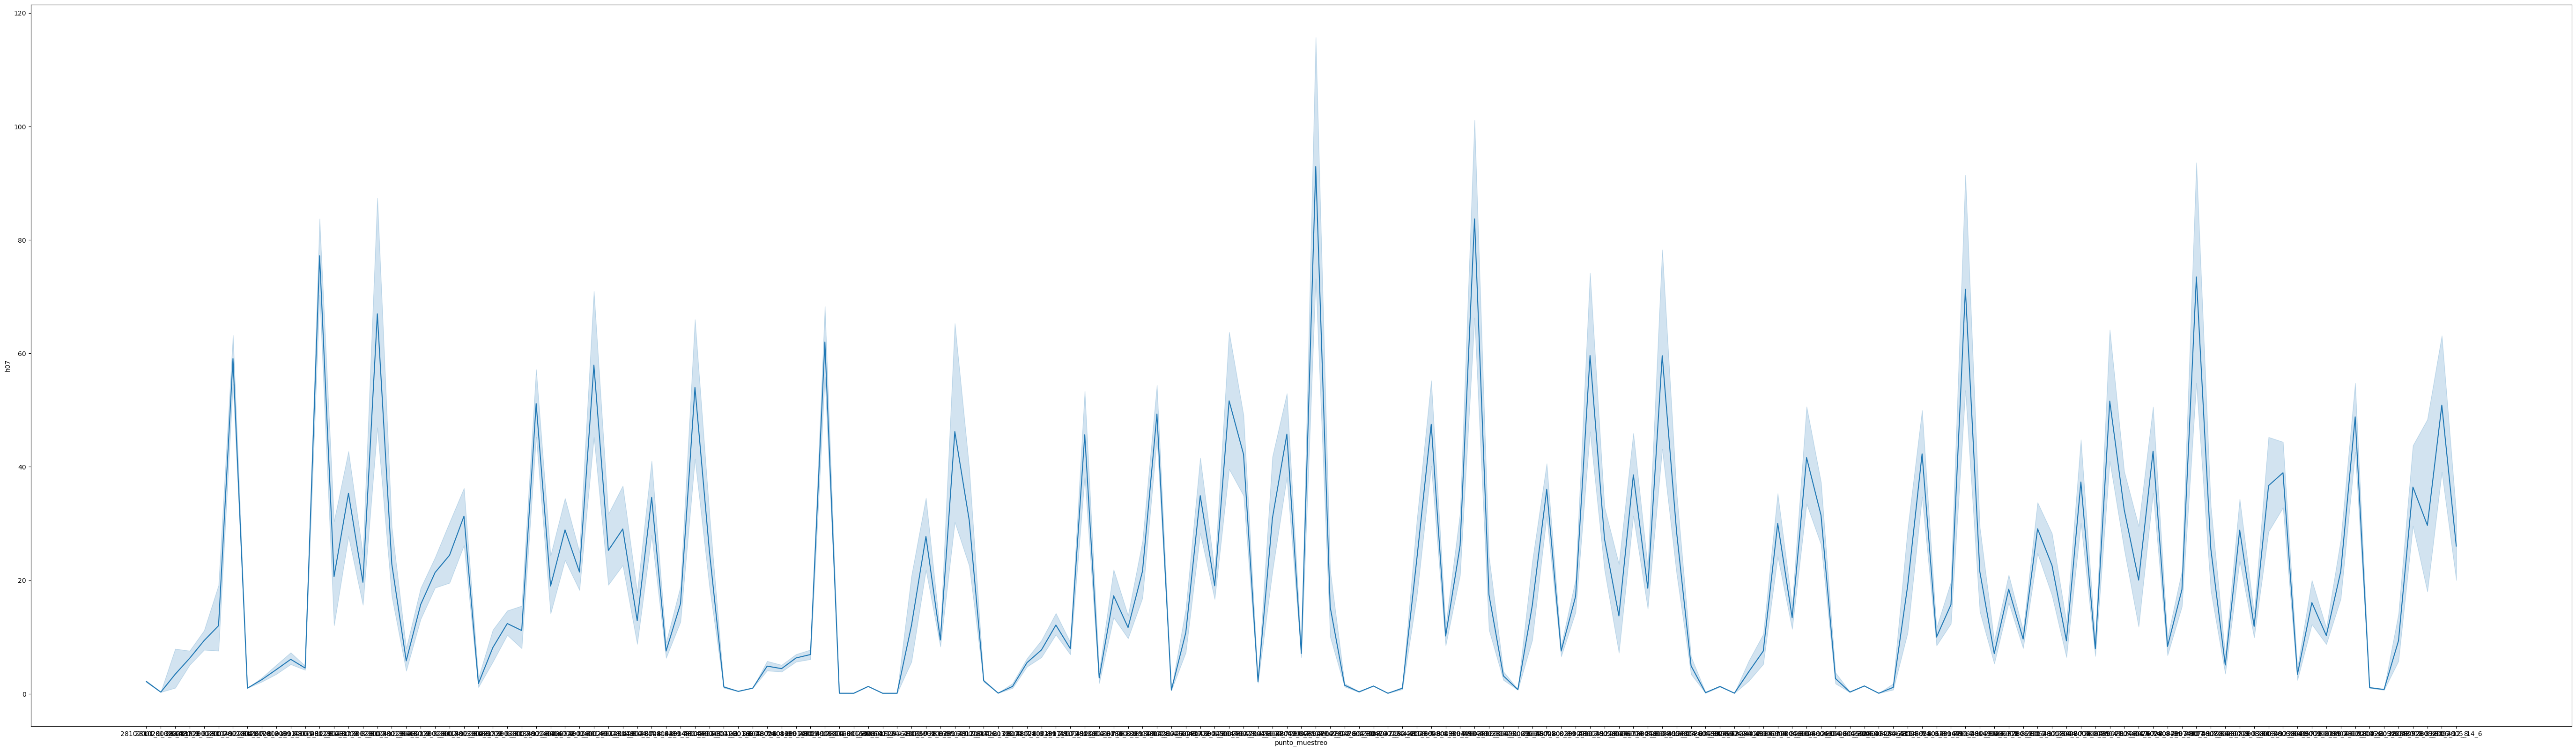

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(70, 20))
sns.lineplot(data=dfinal, x='punto_muestreo', y='h07', ax=ax)


<AxesSubplot:xlabel='punto_muestreo', ylabel='h20'>

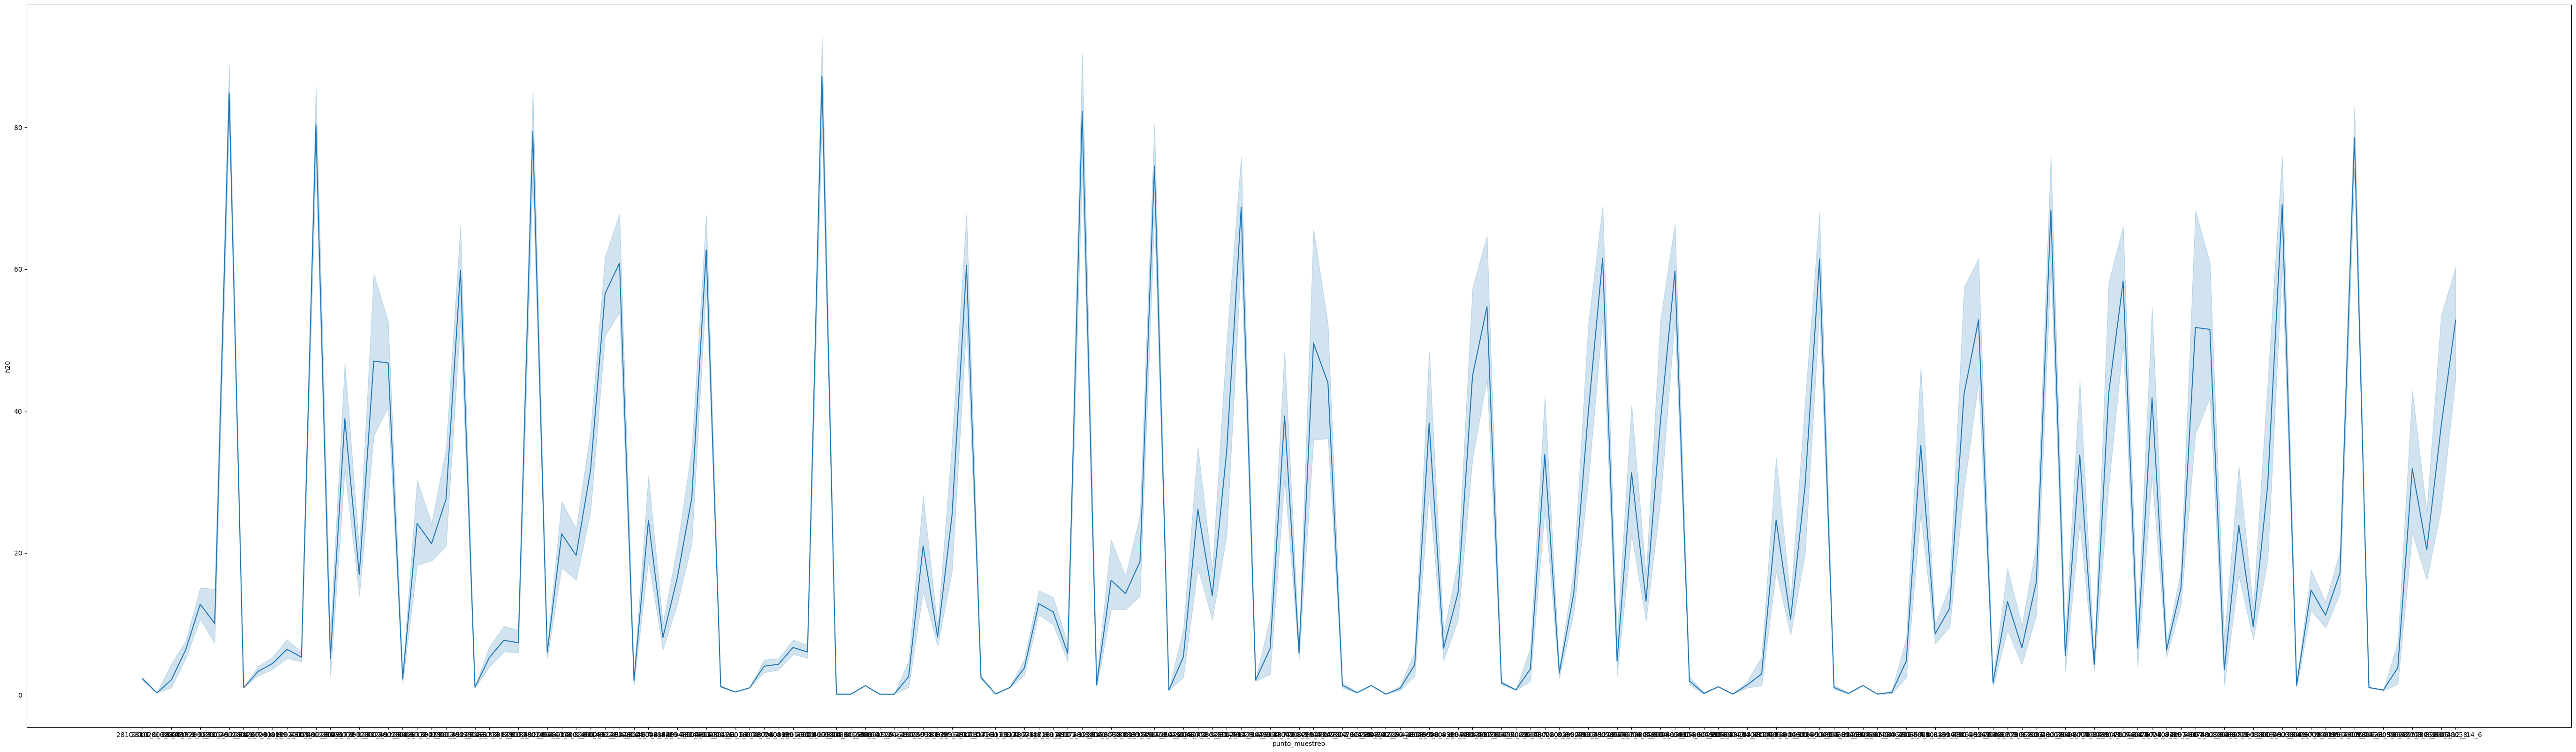

In [10]:
fig, ax = plt.subplots(figsize=(70, 20))
sns.lineplot(data=dfinal, x='punto_muestreo', y='h20', ax=ax)

In [ ]:
# Parte de MySQL

In [11]:
import mysql.connector

In [12]:
con = mysql.connector.connect(user = "root", password = "Real Madrid1", host = "127.0.0.1")

In [13]:
#cursor = con.cursor()
#cursor.execute("CREATE DATABASE contaminacion_madrid;")

DatabaseError: 1007 (HY000): Can't create database 'contaminacion_madrid'; database exists

In [14]:
cursor = con.cursor()
cursor.execute("USE contaminacion_madrid;")

In [15]:
#cursor.execute("CREATE TABLE contaminacion_final (punto_muestreo VARCHAR(255), ano INT, mes INT, dia INT, h07 FLOAT(5,2), h20 FLOAT(5,2));")

In [15]:

for index, row in dfinal.iterrows():
    print()
    cursor.execute("INSERT INTO contaminacion_final([punto_muestreo], [ano], [mes], [dia], [h07], [h20],) values (?, ?, ?, ?, ?, ?)", row['punto_muestreo'], row['ano'], row['mes'], row['dia'], row['h07'], row['h20'])

con.commit()


TypeError: MySQLCursor.execute() takes from 2 to 4 positional arguments but 8 were given

/Users/SergioValerian/opt/anaconda3/envs/IA/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table' AND name=?;': Not all parameters were used in the SQL statement